In [1]:
from glob import glob
from tqdm import tqdm
import pandas as pd
import seaborn as sns

df = pd.read_json('../resources/help-harm-results.jsonl', lines=True)

In [2]:
df.iloc[0]['helpful']['all']

0.4227

In [3]:
def parse_run_specifics(i):
    if 'runs/hmi-' + str(i['year']) + '-rm3/' in i['run']:
        return {
            'RetrievalModel': 'BM25',
            'Expansion': 'RM3',
            'Feedback': int(i['run'].split('rel=')[1].split(')')[0])
        }
    elif 'runs/hmi-' + str(i['year']) + '-rm3-kq/' in i['run']:
        return {
            'RetrievalModel': 'BM25',
            'Expansion': 'RM3-KQ',
            'Feedback': int(i['run'].split('rel=')[1].split(')')[0])
        }
    elif 'runs/hmi-' + str(i['year']) + '/' in i['run']:
        run = i['run'].split('runs/hmi-' + str(i['year']) + '/')[1]
        if '.bm25+rm3_bm25(' in run:
            return {
                'RetrievalModel': 'BM25',
                'Expansion': 'RM3',
                'Feedback': 0,
            }
        if '.bm25_bm25(' in run:
            return {
                'RetrievalModel': 'BM25',
                'Expansion': None,
                'Feedback': 0,
            }
        if '.qld_qld(' in run:
            return {
                'RetrievalModel': 'QLD',
                'Expansion': None,
                'Feedback': 0,
            }
        if '.qld+rm3_qld(' in run:
            return {
                'RetrievalModel': 'QLD',
                'Expansion': 'RM3',
                'Feedback': 0,
            }
        raise ValueError('Can not handle: ' + i['run'])
    else:
        raise ValueError('Can not handle: ' + i['run'])
    
df_eval = []
for _, i in tqdm(df.iterrows()):
    i = dict(i)
    i['helpful'] = i['helpful']['all']
    i['harmful'] = i['harmful']['all']
    i.update(parse_run_specifics(i))
    df_eval += [i]
df_eval = pd.DataFrame(df_eval)
df_eval['Approach'] = df_eval['RetrievalModel'] + df_eval['Expansion'] + '--' + df_eval['Feedback'].astype(str)
df_eval = df_eval[df_eval['RetrievalModel'] == 'BM25']
df_eval['help-harm'] = df_eval['helpful'] - df_eval['harmful']

5469it [00:00, 22567.59it/s]


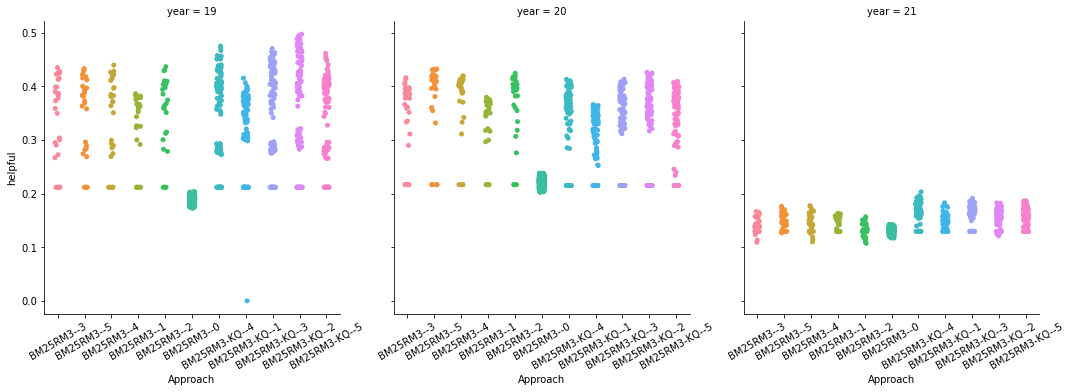

In [4]:
g = sns.catplot(data = df_eval, x='Approach', hue='Expansion',y='helpful', col='year', row)
g.set_xticklabels(rotation=30)

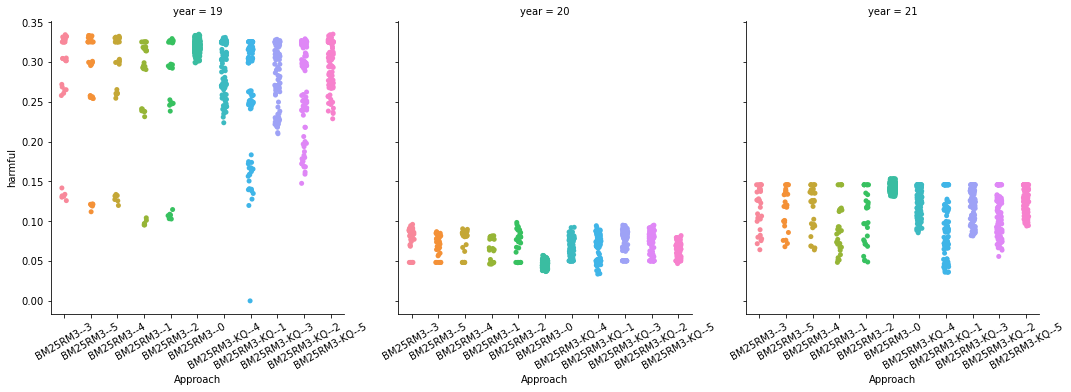

In [5]:
g = sns.catplot(data = df_eval, x='Approach', hue='Approach',y='harmful', col='year')
g.set_xticklabels(rotation=30)

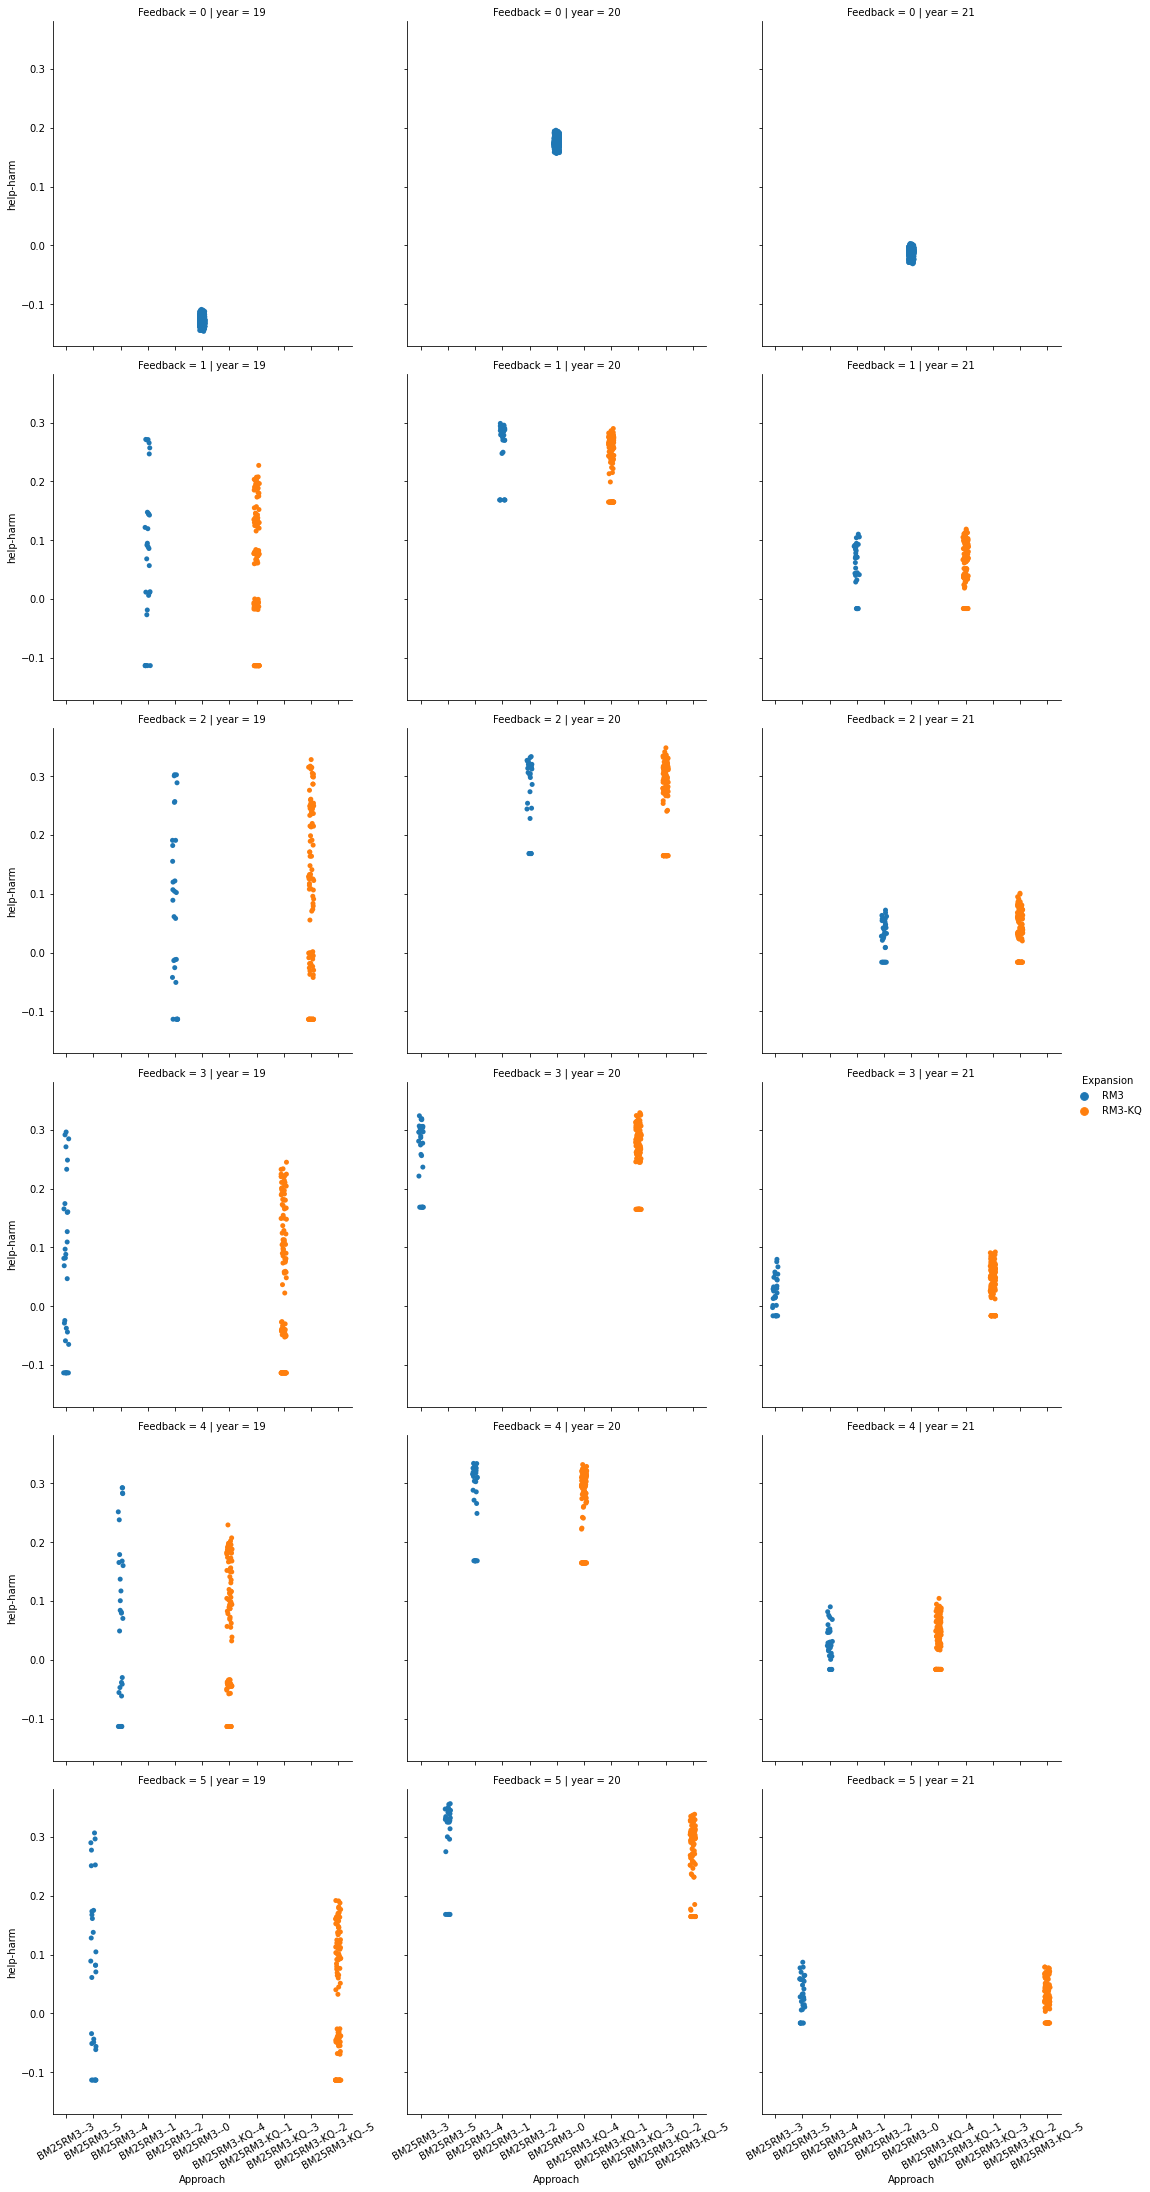

In [10]:
g = sns.catplot(data = df_eval, x='Approach', hue='Expansion',y='help-harm', col='year', row='Feedback')
g.set_xticklabels(rotation=30)

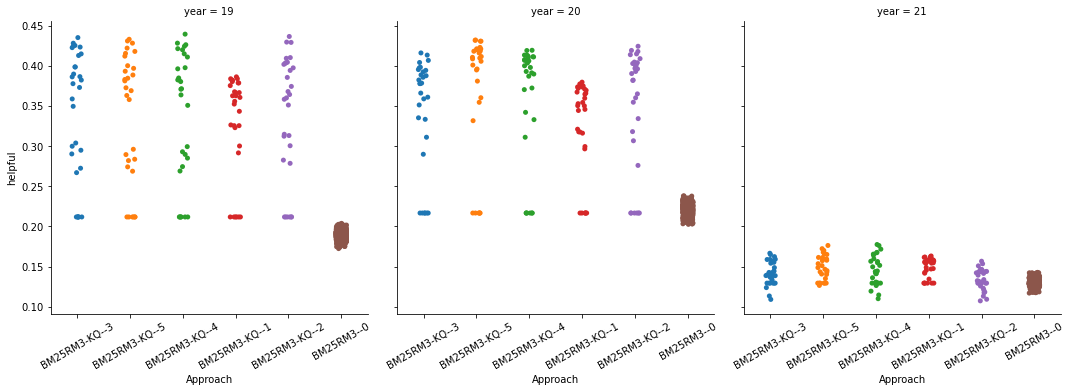

In [35]:
g = sns.catplot(data = df_eval, x='Approach', hue='Approach',y='helpful', col='year')
g.set_xticklabels(rotation=30)

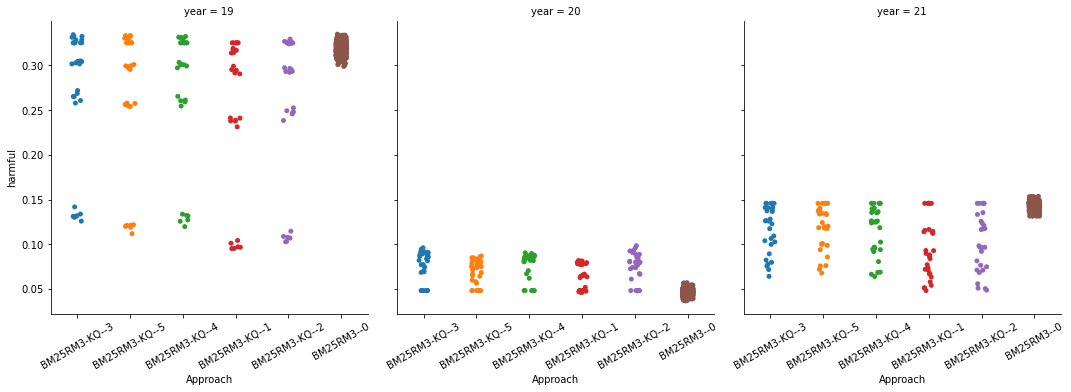

In [36]:
g = sns.catplot(data = df_eval, x='Approach', hue='Approach',y='harmful', col='year')
g.set_xticklabels(rotation=30)

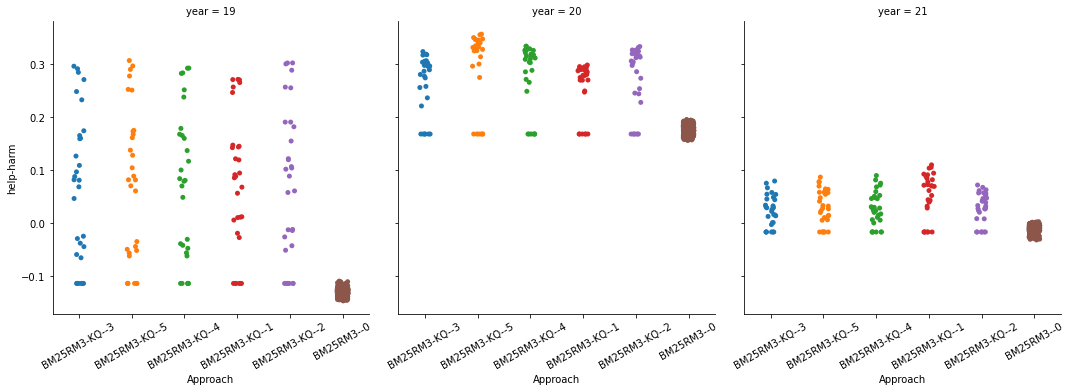

In [37]:
g = sns.catplot(data = df_eval, x='Approach', hue='Approach',y='help-harm', col='year')
g.set_xticklabels(rotation=30)

# Unjudged Removed

In [11]:
df = pd.read_json('../resources/help-harm-results-only-judged.jsonl', lines=True)

In [13]:
def parse_run_specifics(i):
    if 'runs//only-judged/hmi-' + str(i['year']) + '-rm3/' in i['run']:
        return {
            'RetrievalModel': 'BM25',
            'Expansion': 'RM3',
            'Feedback': int(i['run'].split('rel=')[1].split(')')[0])
        }
    elif 'runs//only-judged/hmi-' + str(i['year']) + '-rm3-kq/' in i['run']:
        return {
            'RetrievalModel': 'BM25',
            'Expansion': 'RM3-KQ',
            'Feedback': int(i['run'].split('rel=')[1].split(')')[0])
        }
    elif 'runs//only-judged/hmi-' + str(i['year']) + '/' in i['run']:
        run = i['run'].split('runs//only-judged/hmi-' + str(i['year']) + '/')[1]
        if '.bm25+rm3_bm25(' in run:
            return {
                'RetrievalModel': 'BM25',
                'Expansion': 'RM3',
                'Feedback': 0,
            }
        if '.bm25_bm25(' in run:
            return {
                'RetrievalModel': 'BM25',
                'Expansion': None,
                'Feedback': 0,
            }
        if '.qld_qld(' in run:
            return {
                'RetrievalModel': 'QLD',
                'Expansion': None,
                'Feedback': 0,
            }
        if '.qld+rm3_qld(' in run:
            return {
                'RetrievalModel': 'QLD',
                'Expansion': 'RM3',
                'Feedback': 0,
            }
        raise ValueError('Can not handle: ' + i['run'])
    else:
        raise ValueError('Can not handle: ' + i['run'])

df_eval = []
for _, i in tqdm(df.iterrows()):
    i = dict(i)
    i['helpful'] = i['helpful']['all']
    i['harmful'] = i['harmful']['all']
    i.update(parse_run_specifics(i))
    df_eval += [i]
df_eval = pd.DataFrame(df_eval)
df_eval['Approach'] = df_eval['RetrievalModel'] + df_eval['Expansion'] + '--' + df_eval['Feedback'].astype(str)
df_eval = df_eval[df_eval['RetrievalModel'] == 'BM25']
df_eval['help-harm'] = df_eval['helpful'] - df_eval['harmful']

5469it [00:00, 22088.80it/s]


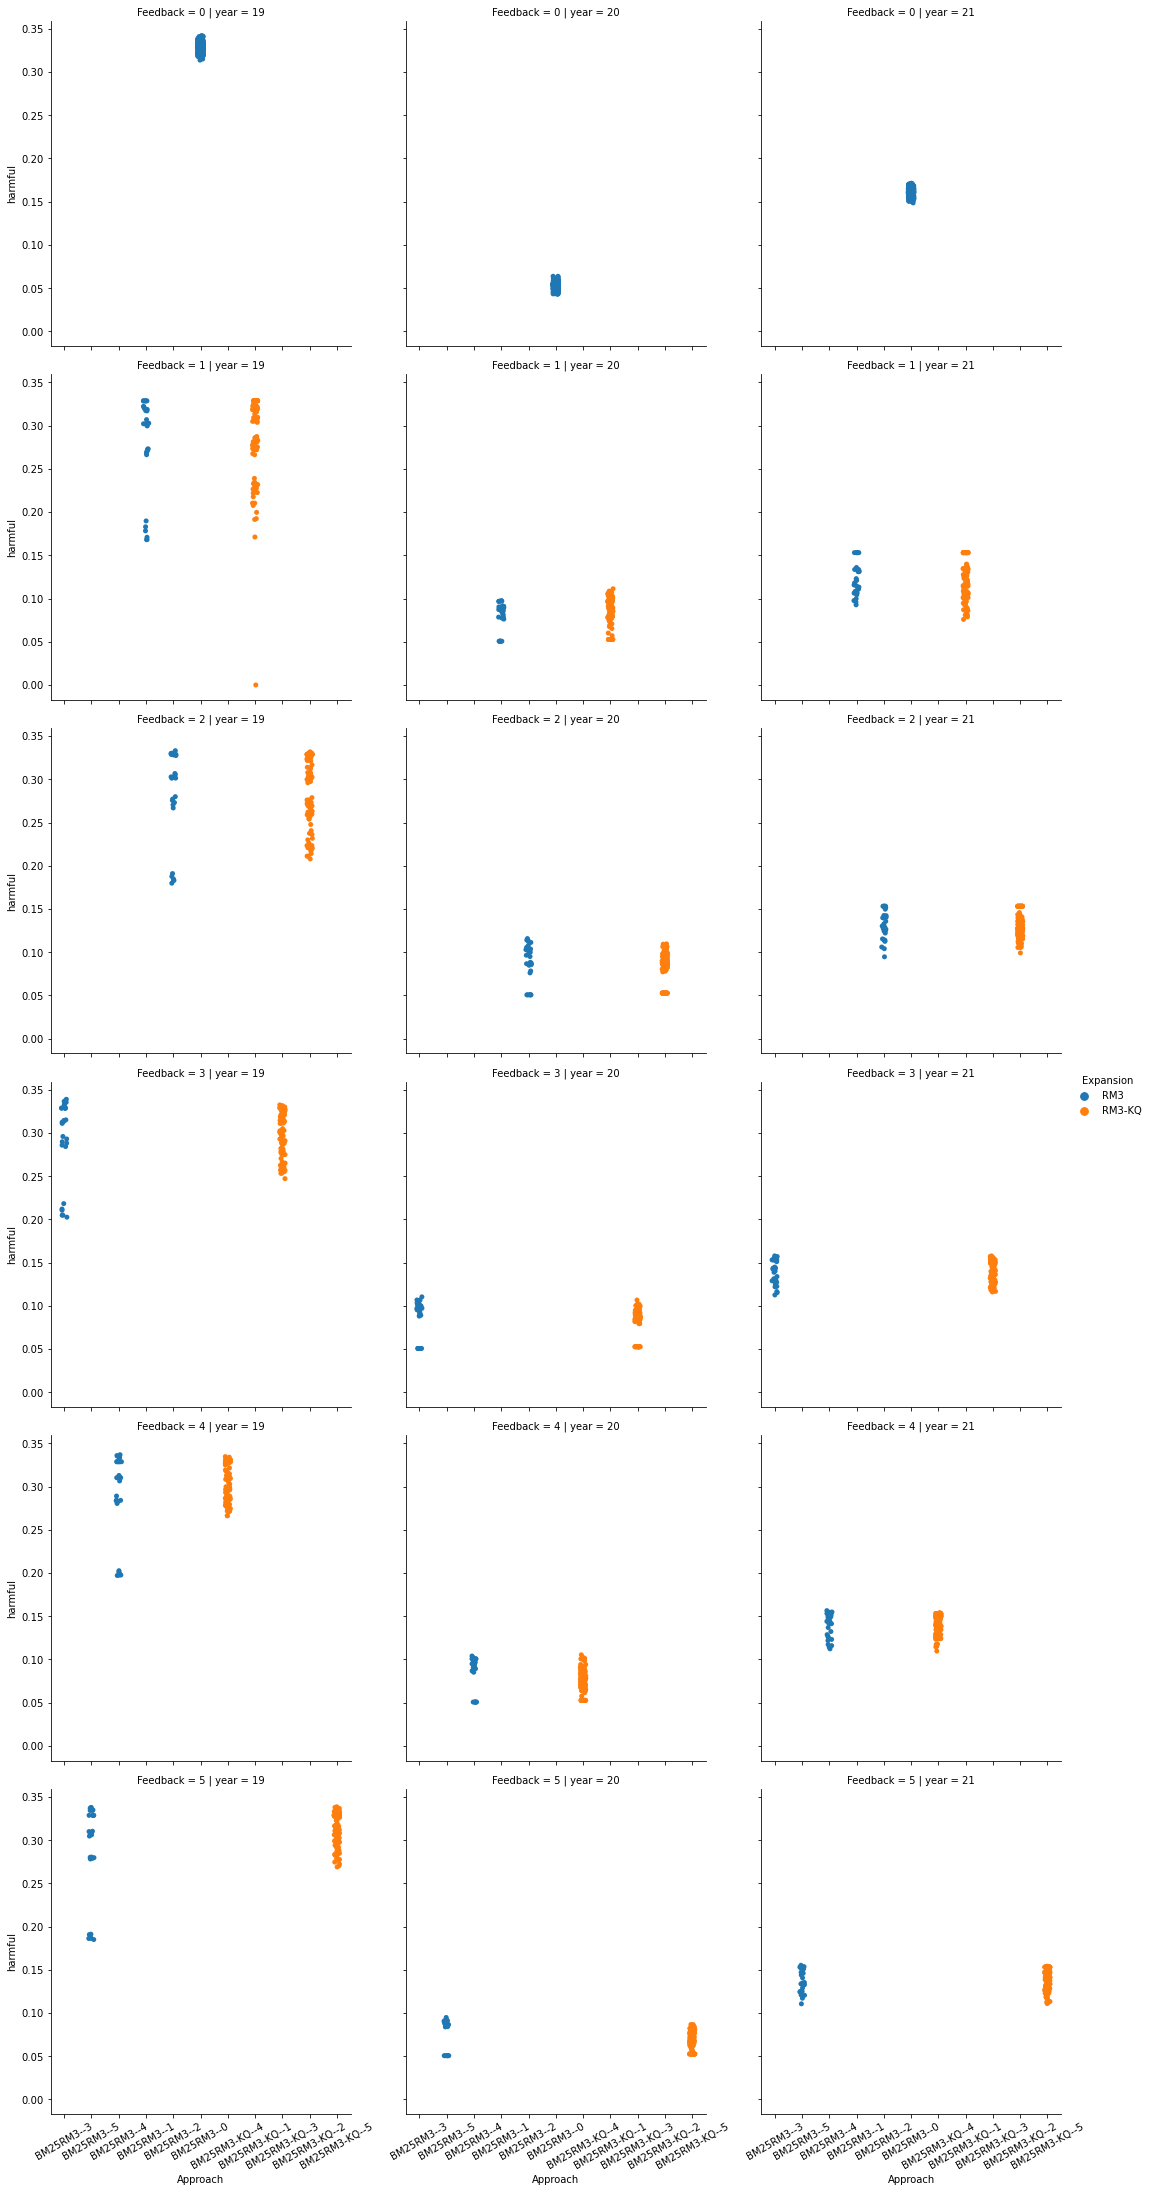

In [17]:
g = sns.catplot(data = df_eval, x='Approach', hue='Expansion',y='harmful', col='year', row='Feedback')
g.set_xticklabels(rotation=30)

# Dummy Results

In [1]:
from glob import glob
from tqdm import tqdm
import pandas as pd
import seaborn as sns

df = pd.read_json('../resources/trec-eval-results.jsonl', lines=True)

In [12]:
def parse_run_specifics(i):
    if 'runs/hmi-' + str(i['year']) + '-rm3/' in i['run']:
        return {
            'RetrievalModel': 'BM25',
            'Expansion': 'RM3',
            'Feedback': int(i['run'].split('rel=')[1].split(')')[0])
        }
    elif 'runs/hmi-' + str(i['year']) + '-rm3-kq/' in i['run']:
        return {
            'RetrievalModel': 'BM25',
            'Expansion': 'RM3-KQ',
            'Feedback': int(i['run'].split('rel=')[1].split(')')[0])
        }
    elif 'runs/hmi-' + str(i['year']) + '/' in i['run']:
        run = i['run'].split('runs/hmi-' + str(i['year']) + '/')[1]
        if '.bm25+rm3_bm25(' in run:
            return {
                'RetrievalModel': 'BM25',
                'Expansion': 'RM3',
                'Feedback': 0,
            }
        if '.bm25_bm25(' in run:
            return {
                'RetrievalModel': 'BM25',
                'Expansion': None,
                'Feedback': 0,
            }
        if '.qld_qld(' in run:
            return {
                'RetrievalModel': 'QLD',
                'Expansion': None,
                'Feedback': 0,
            }
        if '.qld+rm3_qld(' in run:
            return {
                'RetrievalModel': 'QLD',
                'Expansion': 'RM3',
                'Feedback': 0,
            }
        raise ValueError('Can not handle: ' + i['run'])
    else:
        raise ValueError('Can not handle: ' + i['run'])
    
df_eval = []
for _, i in tqdm(df.iterrows()):
    i = dict(i)
    i.update(parse_run_specifics(i))
    df_eval += [i]
df_eval = pd.DataFrame(df_eval)
df_eval['Approach'] = df_eval['RetrievalModel'] + df_eval['Expansion'] + '--' + df_eval['Feedback'].astype(str)
df_eval = df_eval[df_eval['RetrievalModel'] == 'BM25']
df_eval['help-harm-10'] = df_eval['ndcg-at-10-rank-helpful'] - df_eval['ndcg-at-10-rank-harmful']

df_eval['help-harm-20'] = df_eval['ndcg-at-20-rank-helpful'] - df_eval['ndcg-at-20-rank-harmful']

5469it [00:00, 14366.27it/s]


In [15]:
df_eval.iloc[0]

year                                                                                       19
run                                         /mnt/ceph/storage/data-in-progress/data-resear...
unjudged-at-10-helpful                                                               1.015385
unjudged-at-20-helpful                                                               1.075641
reciprocal-rank-helpful                                                              0.659034
reciprocal-rank-unjudged-removed-helpful                                             0.659034
ndcg-at-10-rank-helpful                                                              0.360604
ndcg-at-20-rank-helpful                                                              0.345635
ndcg-unjudged-removed-at-10-rank-helpful                                              0.65021
ndcg-unjudged-removed-at-20-rank-helpful                                             0.644234
unjudged-at-10-harmful                                      

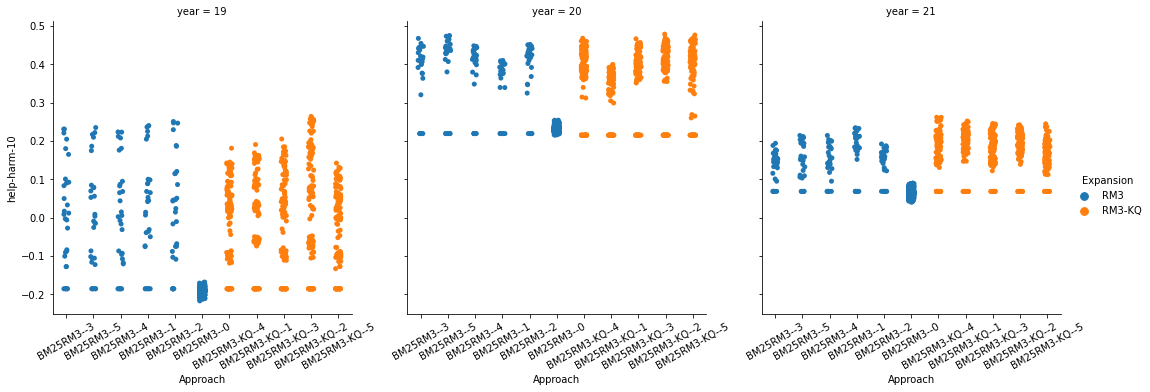

In [13]:
g = sns.catplot(data = df_eval, x='Approach', hue='Expansion',y='help-harm-10', col='year')
g.set_xticklabels(rotation=30)

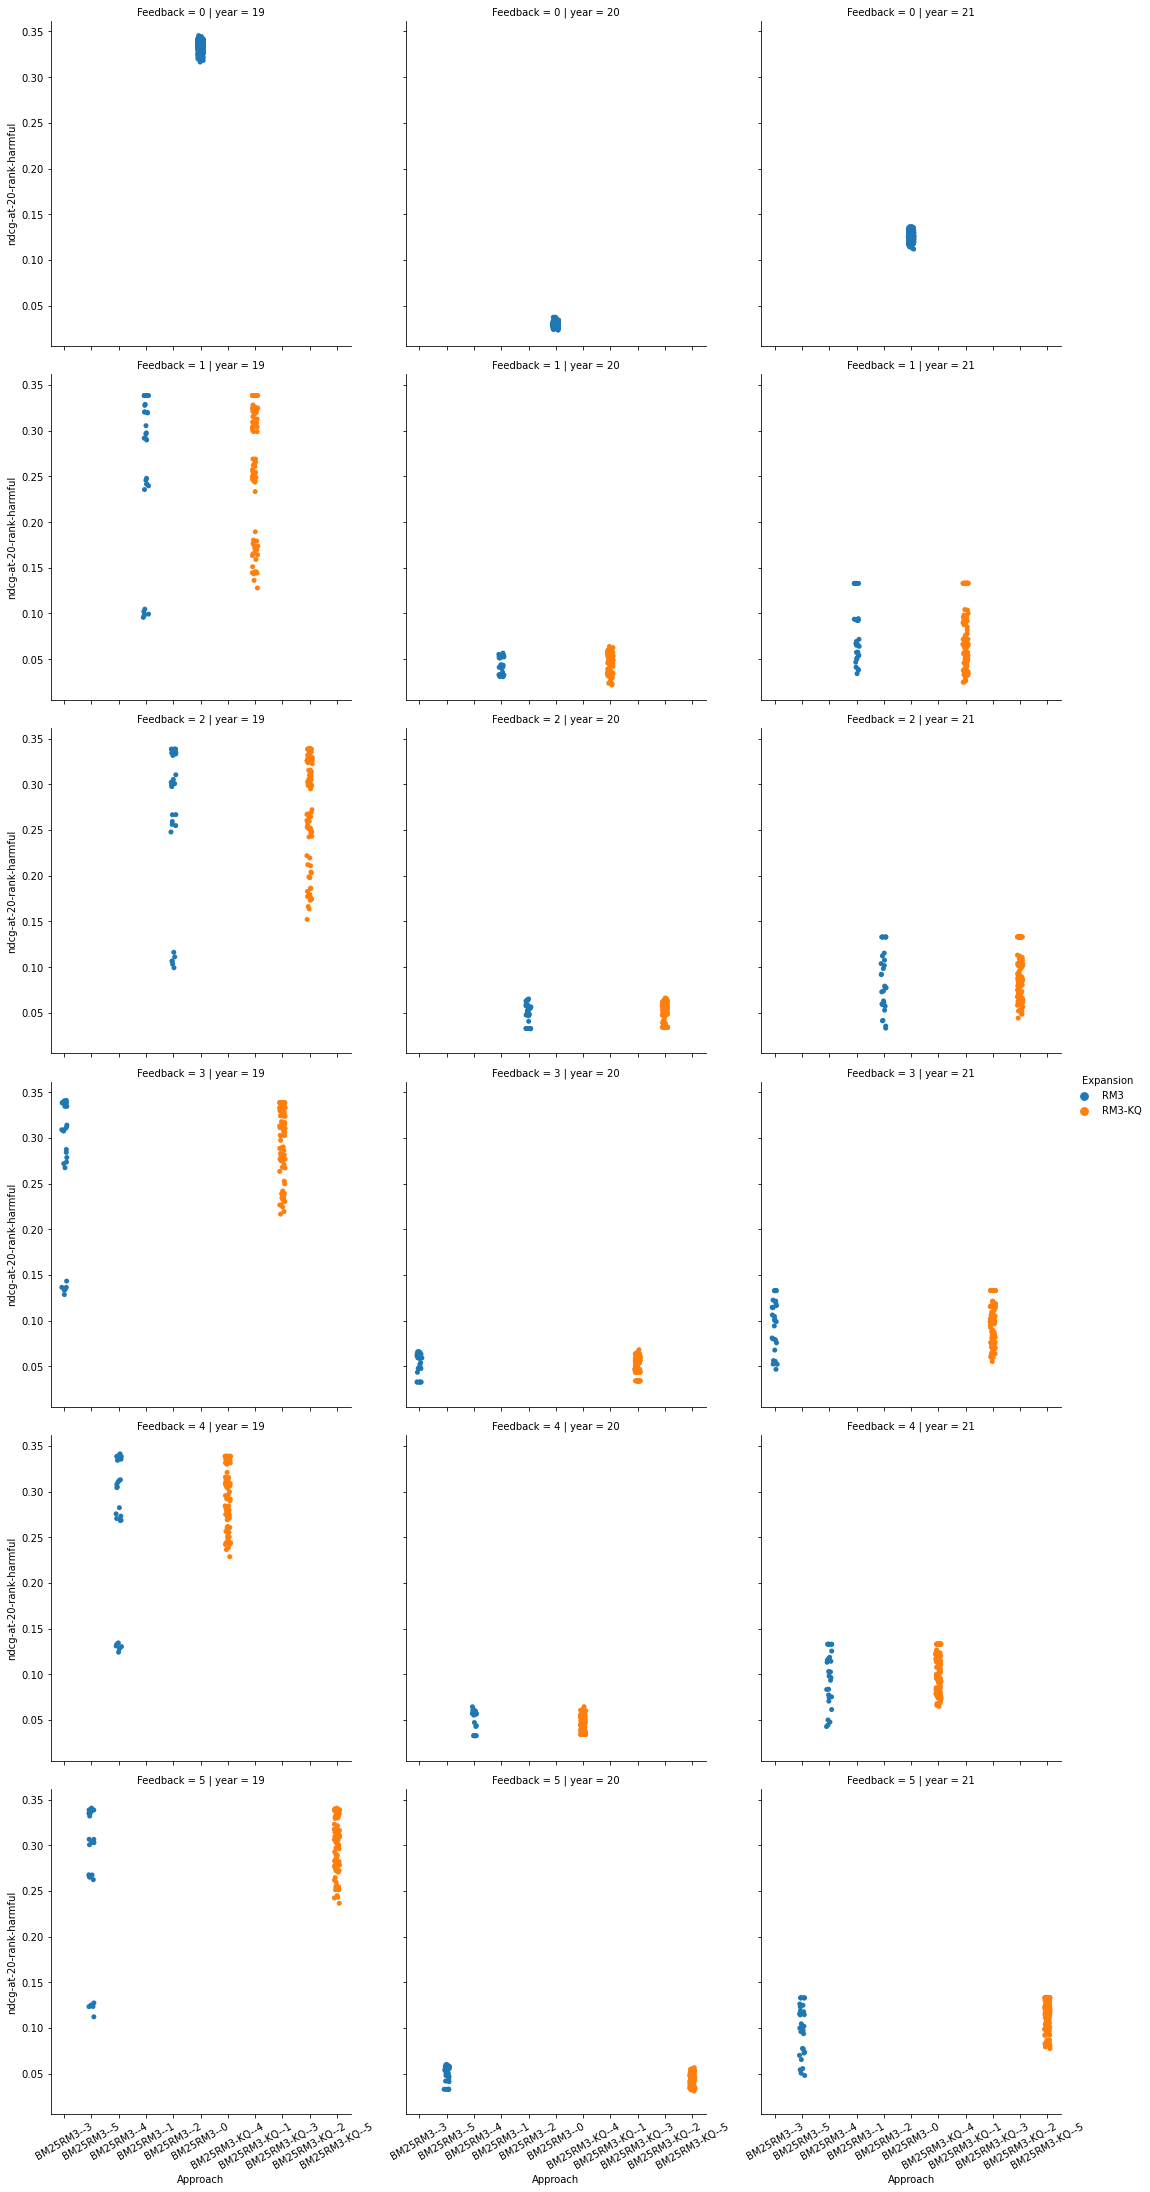

In [20]:
g = sns.catplot(data = df_eval, x='Approach', hue='Expansion',y='ndcg-at-20-rank-harmful', col='year', row='Feedback')
g.set_xticklabels(rotation=30)

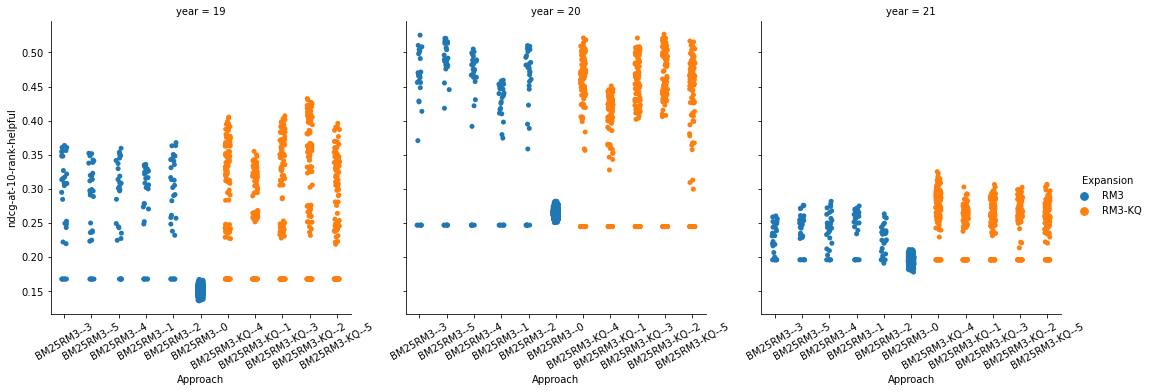

In [10]:
g = sns.catplot(data = df_eval, x='Approach', hue='Expansion',y='ndcg-at-10-rank-helpful', col='year')
g.set_xticklabels(rotation=30)

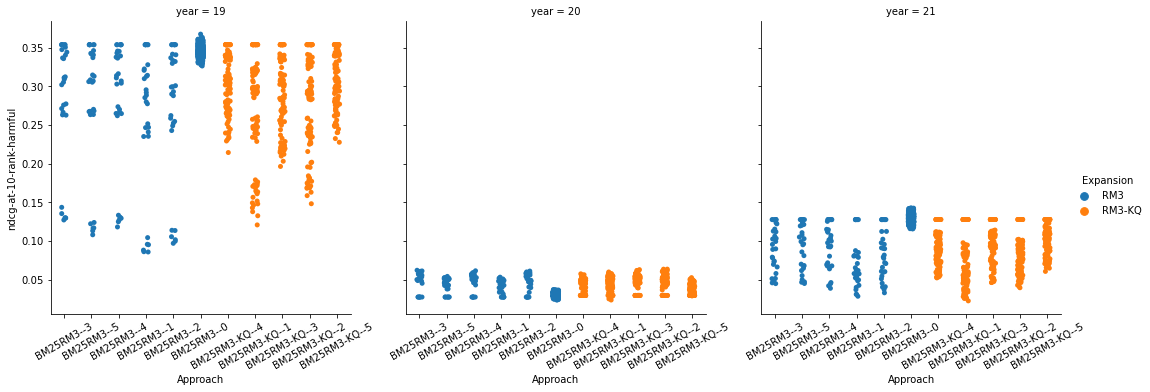

In [11]:
g = sns.catplot(data = df_eval, x='Approach', hue='Expansion',y='ndcg-at-10-rank-harmful', col='year')
g.set_xticklabels(rotation=30)

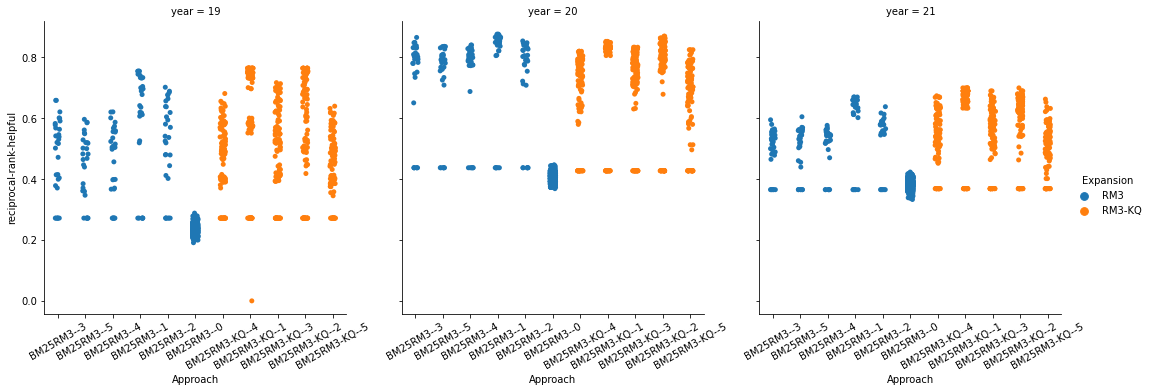

In [7]:
g = sns.catplot(data = df_eval, x='Approach', hue='Expansion',y='reciprocal-rank-helpful', col='year')
g.set_xticklabels(rotation=30)

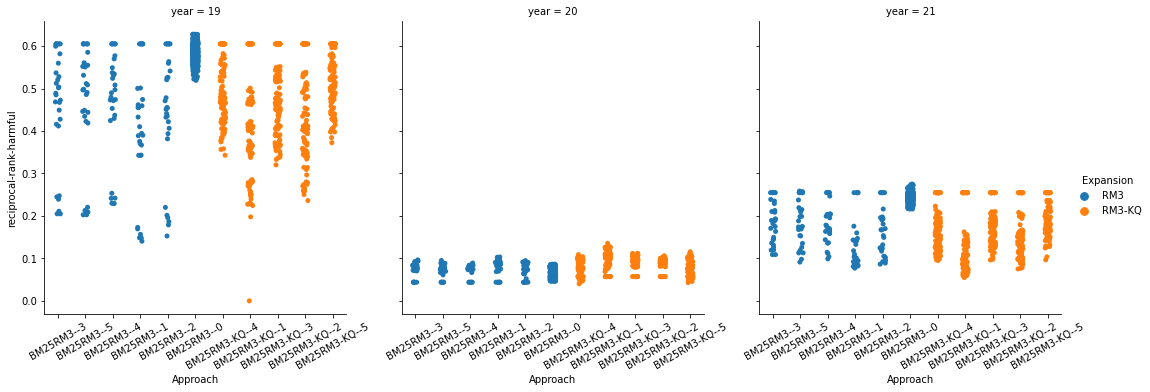

In [8]:
g = sns.catplot(data = df_eval, x='Approach', hue='Expansion',y='reciprocal-rank-harmful', col='year')
g.set_xticklabels(rotation=30)